# Computational Social Science Project #3 

**Enter your Name:** Cindy Alvarez

*Semester:* Fall 2024

## 1. Introduction

### Load data 

In [151]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# !pip install xgboost
import xgboost as xgb

# settings
%matplotlib inline
sns.set_style("darkgrid")

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [152]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [153]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [154]:
# list column names for 2011-2013
chicago_inspections_2011_to_2013.columns


Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [155]:
print("number of columns in 2011-2013:", len(chicago_inspections_2011_to_2013.columns))

number of columns in 2011-2013: 75


In [156]:
# get list of columns for 2011-2013 dataset
data_2011_2013_cols = set(chicago_inspections_2011_to_2013.columns)


In [157]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome for 2011-2013
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [158]:
# convert the inspection date to a datetime format for 2011-2013
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

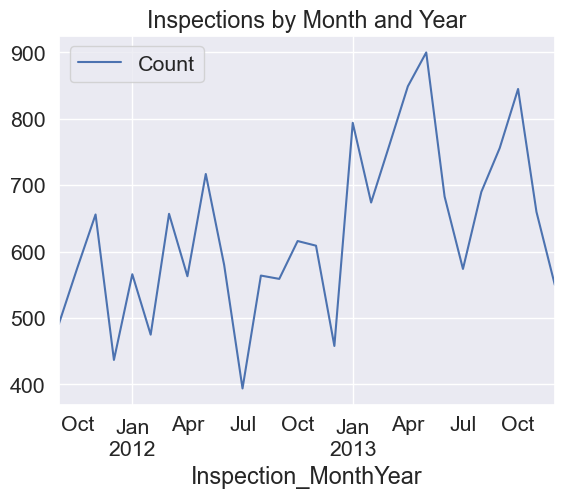

In [159]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

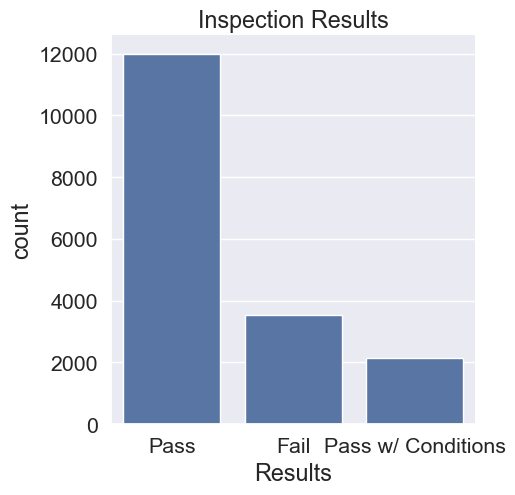

In [160]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

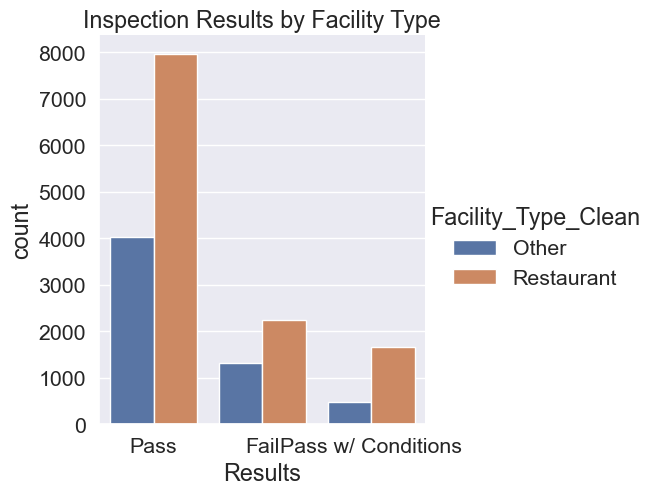

In [161]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [162]:
# drop datetime info from 2011-2013
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [163]:
# 2011-2013 processing
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail" (the event of interest)
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [164]:
# Check original values for training/validation set (2011-2013)
print("Original unique values in Results:")
print(chicago_inspections_2011_to_2013['Results'].value_counts())

# Check after Pass w/ Conditions replacement
y_intermediate = chicago_inspections_2011_to_2013['Results'].replace({'Pass w/ Conditions': 'Pass'})
print("\nUnique values after replacement:")
print(y_intermediate.value_counts())

# Check LabelBinarizer output before final transformation
y_before_where = lb_style.fit_transform(y_intermediate)
print("\nUnique values after LabelBinarizer:")
print(np.unique(y_before_where, return_counts=True))

# Check final encoding
y_final = np.where(y_before_where == 1, 0, 1)
print("\nFinal encoded values:")
print(np.unique(y_final, return_counts=True))

Original unique values in Results:
Results
Pass                  10259
Fail                   3087
Pass w/ Conditions     1965
Name: count, dtype: int64

Unique values after replacement:
Results
Pass    12224
Fail     3087
Name: count, dtype: int64

Unique values after LabelBinarizer:
(array([0, 1]), array([ 3087, 12224], dtype=int64))

Final encoded values:
(array([0, 1]), array([12224,  3087], dtype=int64))


In [165]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


In [166]:
X.columns
print('data types:', X.dtypes)

data types: criticalCount                                    int64
seriousCount                                     int64
minorCount                                       int64
pastFail                                         int64
pastCritical                                     int64
pastSerious                                      int64
pastMinor                                        int64
timeSinceLast                                  float64
firstRecord                                      int64
POLICE_DISTRICT                                float64
ageAtInspection                                float64
consumption_on_premises_incidental_activity      int64
tobacco                                          int64
package_goods                                    int64
outdoor_patio                                    int64
public_place_of_amusement                        int64
limited_business_license                         int64
childrens_services_facility_license              int6

Data splitting

Splitting the data in train and validation sets. I am stratifying the splits by the outcome to ensure I have a representative brakdown of the outcome in my training/validation datasets. Because I will be using the updated 2014 inspections data as my test data, I will split this data into an 80/20 split only.

In [167]:
# set seed
np.random.seed(10)

# training and validation split 
X_train, X_validate, y_train, y_validate = train_test_split(X, 
                                                    y, 
                                                    train_size = .80, 
                                                    test_size=0.20,
                                                    stratify=y)

Because we have features that are numeric, I will standardize the x_train and x_validate datasets. I am doing this after the training/validation split to avoid data leakage.

In [168]:
# # Standardization
# -----------

# load library 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#
## scale the training and validation datasets
X_train_s = scaler.fit_transform(X_train)        # fit and transform the training data
X_validate_s = scaler.fit_transform(X_validate)  # fit and transform the validation data
#
## convert to dataframes
X_train_s_df = pd.DataFrame(X_train_s, columns=X_train.columns)
X_validate_s_df = pd.DataFrame(X_validate_s, columns=X_validate.columns)

## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

Model choice:

I will apply the following three machine learning techniques: logistic refression, random forests, and xgboost(). Below I describe the basic logic and assumptions for each model, pros/cons, and why it is a plausible choice for this problem.

1. Logistic Regression:
- Basic Logic: Models the probability of inspection failure using a linear combination of features transformed through a logistic function
- Assumptions:
  * Linear relationship between features and log-odds of the outcome
  * Independence of observations
  * Limited multicollinearity among predictors
- Pros:
  * Highly interpretable - can understand which factors most influence inspection outcomes
  * Provides probability estimates
  * Computationally efficient for large datasets
  * Good for inferential analysis
- Cons:
  * Cannot capture complex non-linear relationships
  * May underperform if features interact in comppex ways in this context
- Why Plausible:
  * Many factors affecting inspection results may have linear relationships
  * City officials need interpretable results to justify decisions
  * Can help identify key risk factors

2. Random Forests:
- Basic Logic: Ensemble method that builds multiple decision trees and aggregates their predictions
- Assumptions:
  * Fewer assumptions than logistic regression
  * Features contain information relevant to prediction
- Pros:
  * Handles non-linear relationships and interactions automatically
  * Built-in feature importance measures
  * Resistant to overfitting
  * Handles missing values well
  * Can capture complex patterns in business and neighborhood characteristics
- Cons:
  * Less interpretable than logistic regression
  * Computationally more intensWhy plausible in this contextrequire more tuning
- Why Plausible:
  * Food inspection failures likely involve complex interactions between various factors
  * Can handle mixed data types (numerical and categorical) common in municipal data
  * Robust to outliers and noisy data

3. XGBoost:
- Basic Logic: Gradient boosting implementation that builds trees sequentially, with each tree correcting errors of previous trees
- Assumptions:
  * Similar to random forests - relatively assumption-free
  * Sufficient data quality to learn patterns
- Pros:
  * Often achieves superior predictive performanwhen
  * Handles imbalanced da as seen above in our resultsta well (important if pass/fail rates are uneven)
  * Built-in regularization to prevent overfitting
  * Efficient handling of missing values
  * Can capture very complex patterns
- Cons:
  * More hyperparameters to tune than other methods
  * Can be more prone to overfitting if not properly tuWhy plausible in this context Excellent track record in similar classification problems
  * Can handle the likely class imbalance in inspection results
  * Good at finding subtle patterns that might predict violations

For this specific problem, I chose these three methods because they offer a good balance of interpretability (logistic regresntation considerations for this food inspection context?





### Model 1

In [169]:
# create a model
logit_reg = LogisticRegression(class_weight= 'balanced') # using balanced class weights given the ~4:1 imbalance observed above in the results

# fit the model
logit_model = logit_reg.fit(X_train, y_train.ravel())

# predict on the validation data
y_pred = logit_model.predict(X_validate)


Create a confusion matrix to visualize how well the logistic model did with predictions

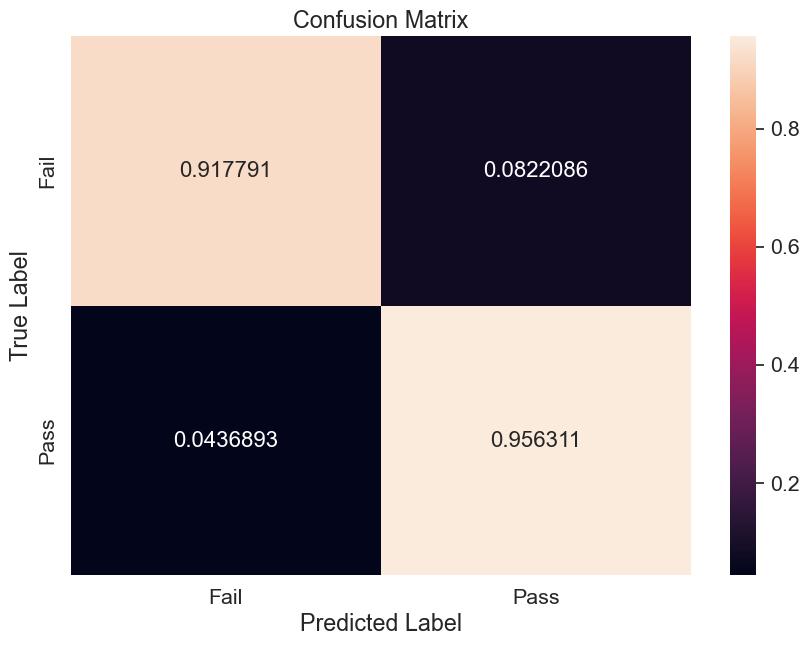

In [148]:
# create a confusion matrix
cf_matrix = confusion_matrix(y_validate, 
                             y_pred, 
                             normalize = "true")

# convert to a dataframe
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

# set figure specifications
df_cm = df_cm.rename(index=str, columns={0: "Fail", 1: "Pass"})
df_cm.index = ["Fail", "Pass"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Based on the confusion matrix, the logistic model does a good job predicting true positives (top left) and true negatives (bottom right).

In [170]:
# hyperparameter tuning
# ----------

# import libraries
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

# set parameters
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}


# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model, 
                          param_grid, 
                          cv=3)
logit_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print results
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'fit_intercept': True, 'penalty': 'elasticnet', 'solver': 'liblinear'}
Validation Accuracy 0.9252366960496246


In [171]:
# Saving final logistic regression model as model1

model1 = logit_grid.best_estimator_

###  Model 2

For my random forest model, I begin by conducting a GridSearch to identify the best parameters for this model, then I train the optimal model, and conduct cross validation to do an initial evaluation of the model.

In [23]:
# Conduct GridSearch to find the best parameters

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

# Create base model
rf = RandomForestClassifier(random_state=42)

# Create and run GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# Fit the grid search
grid_search.fit(X, y)

print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 150}
Best cross-validation score: 0.9224743276999555


In [24]:
# Create a model with the optimal parameters identified above

model2 = grid_search.best_estimator_

In [25]:
# 2. Validate with cross-validation
scores = cross_val_score(model2,
                        X,
                        y,
                        cv=3)

# Calculate the average score across models
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())



Cross-validation scores: [0.92084639 0.91967085 0.92690574]
Average CV score: 0.9224743276999555


### Model 3

In [26]:
# initialize an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=10)

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Initialize and run GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    cv=3,                  
    scoring='accuracy',    
    n_jobs=-1
)

# Fit the model
grid_search.fit(X, y)

# Get best model and save as model3
model3 = grid_search.best_estimator_

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

Given the public health-related context of this food inspection prediction project, the most important metrics to prioritize for evaluating the three models would be Recall and Precision, with Recall being the most important:

1. Recall (Primary Focus):
- Recall measures the proportion of actual failures that the model correctly identifies
- In this context, missing a failing establishment (false negative) is more serious than wrongly flagging a passing one (false positive)
- A high recall means the model is catching most of the establishments that would fail inspections
- Public health and safety is the primary concern, so I want to minimize missing problematic establishments

2. Precision (Secondary Focus):
- Precision measures how many of the predicted failures are actually failures
- Important because the Department has limited and because we want to ensure that we don't unfarily damage businesses' reputations if they are incorrectly labeled as "failing"ablishments
- Need to balance with recall since I don't want to overwhelm inspectors with too many false alarms

3. F1 Score (Helpful but Less Critical):
- As it's the harmonic mean of precision and recall, it can help me balance both metrics
- Useful for comparing models but not as directly interpretable for stakeholders

4. Accuracy (Least Important):
- Less relevant here because:
  - Dataset might be imbalanced (likely more passes than fails)
  - Missing a failing establishment is more costly than missing a passing one
  - Overall accuracy doesn't capture the specific needs of public health inspen to fine-tune the selection.

In [27]:
# List of models to evaluate
models = {
    'Model 1': model1,
    'Model 2': model2,
    'Model 3': model3
}

# Metrics to evaluate
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Dictionary to store all results
results = {}

# Loop through each model and metric
for model_name, model in models.items():
    model_scores = {}
    for metric in scoring_metrics:
        scores = cross_val_score(
            model,
            X,
            y,
            cv=3,  
            scoring=metric
        )
        model_scores[metric] = {
            'mean': scores.mean(),
            'std': scores.std(),
            'scores': scores
        }
    results[model_name] = model_scores

# Create a summary DataFrame focusing on precision and recall
summary_data = []
for model_name, metrics in results.items():
    summary_data.append({
        'Model': model_name,
        'Precision (mean ± std)': f"{metrics['precision']['mean']:.4f} ± {metrics['precision']['std']:.4f}",
        'Recall (mean ± std)': f"{metrics['recall']['mean']:.4f} ± {metrics['recall']['std']:.4f}",
        'F1 (mean ± std)': f"{metrics['f1']['mean']:.4f} ± {metrics['f1']['std']:.4f}",
        'Accuracy (mean ± std)': f"{metrics['accuracy']['mean']:.4f} ± {metrics['accuracy']['std']:.4f}"
    })

summary_df = pd.DataFrame(summary_data)

# Print detailed results
print("Detailed Model Evaluation Results:")
print("-" * 50)
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print("-" * len(model_name))
    
    # Sort metrics to prioritize precision and recall
    priority_order = ['precision', 'recall', 'f1', 'accuracy']
    for metric in priority_order:
        scores = metrics[metric]
        print(f"\n{metric.capitalize()}:")
        print(f"Mean: {scores['mean']:.4f}")
        print(f"Std: {scores['std']:.4f}")
        print("Individual fold scores:")
        for i, score in enumerate(scores['scores'], 1):
            print(f"  Fold {i}: {score:.4f}")

# Print summary DataFrame
print("\nSummary of All Models:")
print("-" * 50)
print(summary_df.to_string(index=False))

# Find best model for each metric
best_models = {}
for metric in scoring_metrics:
    best_score = 0
    best_model = None
    for model_name, metrics in results.items():
        if metrics[metric]['mean'] > best_score:
            best_score = metrics[metric]['mean']
            best_model = model_name
    best_models[metric] = (best_model, best_score)

print("\nBest Models by Metric:")
print("-" * 50)
for metric, (model, score) in best_models.items():
    print(f"{metric.capitalize()}: {model} (Score: {score:.4f})")

Detailed Model Evaluation Results:
--------------------------------------------------

Model 1:
-------

Precision:
Mean: 0.7358
Std: 0.0054
Individual fold scores:
  Fold 1: 0.7312
  Fold 2: 0.7329
  Fold 3: 0.7434

Recall:
Mean: 0.9540
Std: 0.0193
Individual fold scores:
  Fold 1: 0.9329
  Fold 2: 0.9495
  Fold 3: 0.9796

F1:
Mean: 0.8308
Std: 0.0107
Individual fold scores:
  Fold 1: 0.8198
  Fold 2: 0.8273
  Fold 3: 0.8453

Accuracy:
Mean: 0.9217
Std: 0.0044
Individual fold scores:
  Fold 1: 0.9173
  Fold 2: 0.9201
  Fold 3: 0.9277

Model 2:
-------

Precision:
Mean: 0.7689
Std: 0.0139
Individual fold scores:
  Fold 1: 0.7660
  Fold 2: 0.7535
  Fold 3: 0.7872

Recall:
Mean: 0.8808
Std: 0.0094
Individual fold scores:
  Fold 1: 0.8746
  Fold 2: 0.8941
  Fold 3: 0.8737

F1:
Mean: 0.8209
Std: 0.0052
Individual fold scores:
  Fold 1: 0.8167
  Fold 2: 0.8178
  Fold 3: 0.8282

Accuracy:
Mean: 0.9225
Std: 0.0032
Individual fold scores:
  Fold 1: 0.9208
  Fold 2: 0.9197
  Fold 3: 0.9269

Mod

G iven the above results, model 1 seems the best suited for our needs as it has the highest recall (0.9540), so it catches 95.4% of actual violations and thus protecting public health, while also having a reasonable precision score (0.7358) that is only slightly lower than the two other models. 

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

Below, I run coefficient plots and importance plots to determine which features are most important for each model.

#### Model 1

In [28]:
# create a function to extract and plot coefficients that I can use for my models

def extract_and_plot_coefficients(model, X, n_top=10, figsize=(10, 6)):
    
    # Extract coefficients and create dataframe
    logit_data = pd.concat([
        pd.DataFrame(X.columns),
        pd.DataFrame(np.transpose(model.coef_))
    ], axis=1)
    
    # Name the columns
    logit_data.columns = ['Feature', 'Coefficient']
    
    # Add absolute coefficient values
    logit_data['abs_coef'] = abs(logit_data['Coefficient'])
    
    # Sort by absolute coefficient value
    logit_data = logit_data.sort_values('abs_coef', ascending=False)
    
    # Create the plot
    plt.figure(figsize=figsize)
    sns.barplot(
        x="Coefficient", 
        y="Feature", 
        data=logit_data.nlargest(n_top, 'abs_coef')
    ).set_title(f"Top {n_top} Logit Coefficients")
    
    plt.tight_layout()
    plt.show()
    
    return logit_data

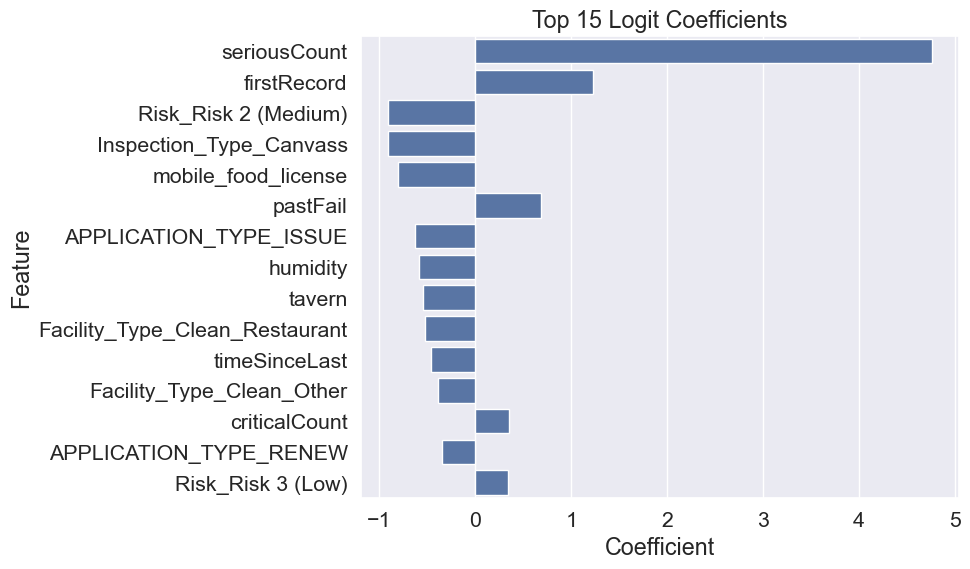

                                        Feature  Coefficient  abs_coef
1                                  seriousCount     4.762924  4.762924
8                                   firstRecord     1.230437  1.230437
32                         Risk_Risk 2 (Medium)    -0.907156  0.907156
34                      Inspection_Type_Canvass    -0.905577  0.905577
22                          mobile_food_license    -0.803250  0.803250
3                                      pastFail     0.684655  0.684655
39                       APPLICATION_TYPE_ISSUE    -0.621497  0.621497
26                                     humidity    -0.588006  0.588006
18                                       tavern    -0.546534  0.546534
36               Facility_Type_Clean_Restaurant    -0.518782  0.518782
7                                 timeSinceLast    -0.456864  0.456864
35                    Facility_Type_Clean_Other    -0.386795  0.386795
0                                 criticalCount     0.352867  0.352867
40    

In [32]:
# Extract coefficients and create plot of top 15 coefficients
logit_data = extract_and_plot_coefficients(model1, X, n_top=15)

# Access the full coefficient data:
print(logit_data.sort_values('abs_coef', ascending=False))


This coefficient plot shows the directional impact of each feature, with positive coefficients indicating increased likelihood of inspection failure and negative coefficients suggesting decreased likelihood. 'SeriousCount' has the strongest positive coefficient (~4.7), followed by 'firstRecord' (~1.2), indicating these factors significantly increase the probability of failing an inspection. Interestingly, being a mobile food license holder and certain inspection types (like canvass) have negative coefficients, suggesting these categories are less likely to fail inspections. The model provides more interpretable insights than the following feature importance charts because it shows both magnitude and direction of each feature's impact.

#### Model 2

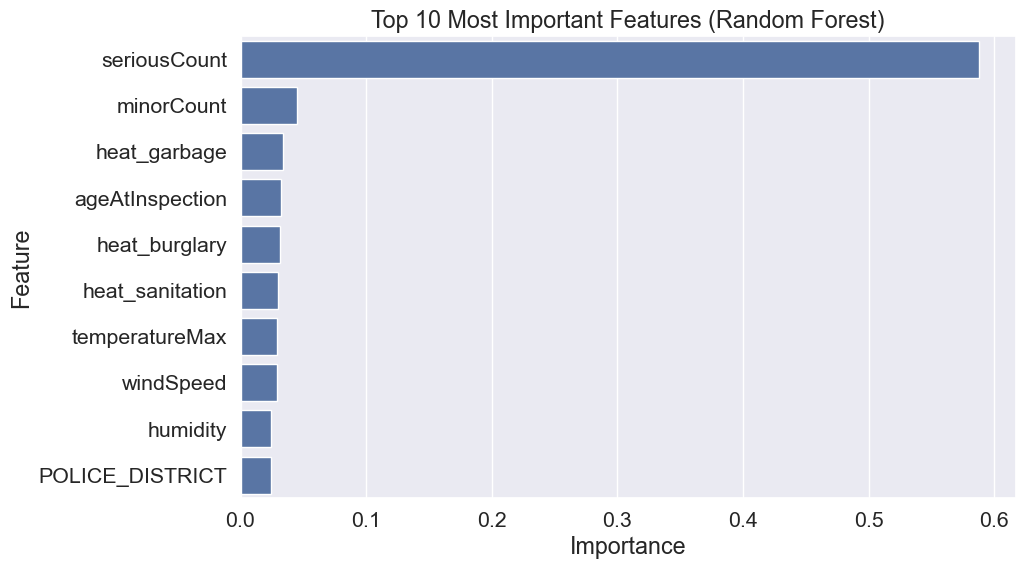

In [50]:
# Fit the model on full dataset
model2.fit(X, y.ravel())

# Feature importance analysis with top 10 features
import seaborn as sns

# Create feature importance dataframe using your method
feat_importances = pd.concat([
    pd.DataFrame(X.columns),
    pd.DataFrame(np.transpose(model2.feature_importances_))
], axis=1)
feat_importances.columns = ["Feature", "Importance"]

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance",
            y="Feature",
            data=feat_importances.nlargest(10, 'Importance'))
plt.title('Top 10 Most Important Features (Random Forest)')
plt.show()

In model2, 'seriousCount' is again the dominant feature with an importance score of about 0.6, but this model shows a different set of secondary features compared to the previous one. Notably, environmental and operational factors like heat-related issues (garbage, burglary, sanitation) and weather conditions (temperatureMax, windSpeed, humidity) are identified as moderately important predictors. The inclusion of these environmental factors suggests this model may be taking a more holistic approach to predicting inspection outcomes.

#### Model 3

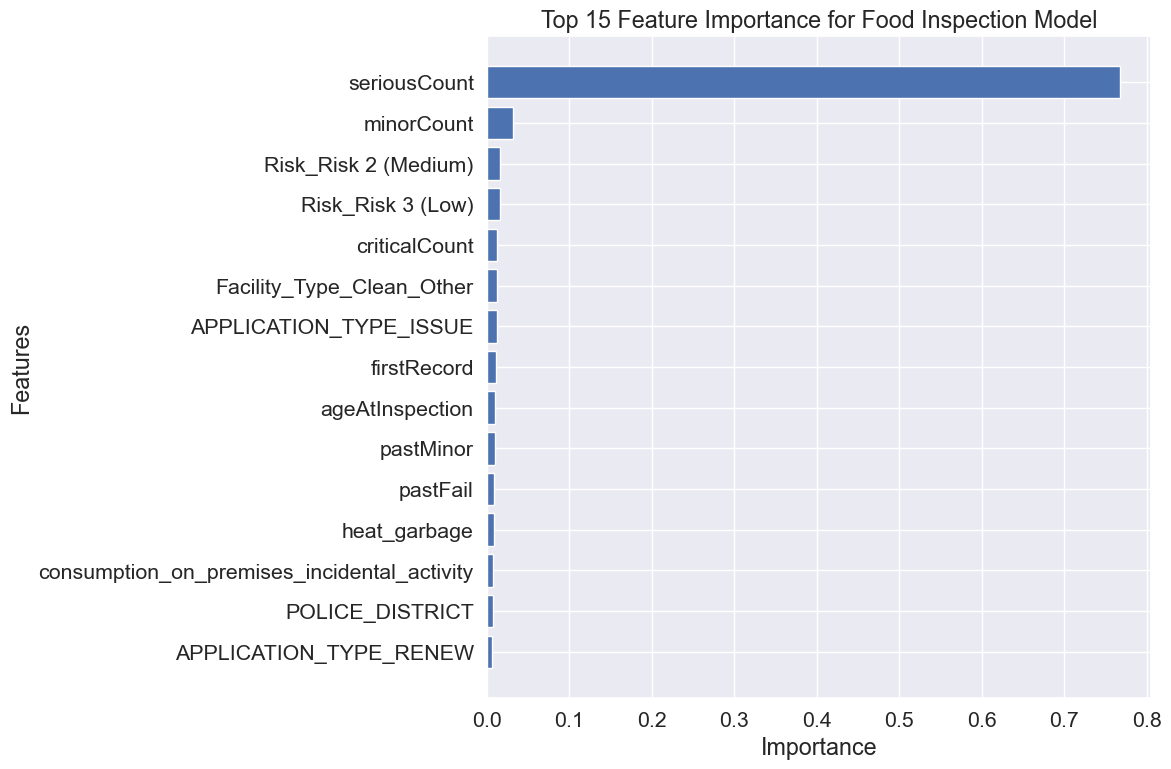

In [49]:
# Get feature importances and create a dataframe to sort them
import pandas as pd
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': grid_search.best_estimator_.feature_importances_
})

# Sort by importance and get top 15
top_15 = feature_importance_df.sort_values('importance', ascending=False).head(15)

# Create figure with size
plt.figure(figsize=(12, 8))

# Create bar plot using sorted data
plt.barh(top_15['feature'], top_15['importance'],
         align='center')

# Labels
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 15 Feature Importance for Food Inspection Model')

# Get current axes and invert y-axis
ax = plt.gca()
ax.invert_yaxis()  # This will show highest importance at the top

plt.tight_layout()  # Add this to prevent label cutoff
plt.show()

This feature importance chart shows that 'seriousCount' is by far the most influential feature in the Food Inspection Model, with an importance score of around 0.8. The second tier of important features includes 'minorCount' and risk-related variables (Risk_Risk 2 and Risk_Risk 3), though their importance scores are significantly lower at around 0.1. Other features like 'criticalCount', facility type, and various application types have minimal impact on the model's predictions, with importance scores close to 0.

Additional features that would be helpful for my analysis that we don't have in this dataset include:

Features related to staff qualifications:

* Number of certified food safety managers
* Staff turnover rate
* Years of experience of kitchen management
* Food safety training completion rates

Kitchen Operations:

* Age of refrigeration equipment
* Number of prep stations
* Storage capacity
* Number of daily meals served
* Complexity of menu (number of items)

Customer information:

* Price point/average check size
* Online ratings/reviews
* Customer complaints history

Facility Information

* Last renovation date
* Age of building
* Ventilation system type/age

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [43]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------
# Using model1 (logistic model) to predict outcomes and probabilities on validation data. Saving the "Chicago 
# Inspection 2014_updated" data for the last section where we predict using the test data.

def get_predictions(model, X):
    # Get binary predictions
    y_pred = model1.predict(X)
    
    # Get probability predictions (we want probability of "fail" which is class 1)
    y_prob = model1.predict_proba(X)[:, 1]
    
    return y_pred, y_prob


In [32]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------

def prioritize_audits(X, probabilities):
    # Create DataFrame with predictions
    audit_priorities = pd.DataFrame({
        'index': X.index,
        'fail_probability': probabilities
    })
    
    # Sort by probability of failure in descending order
    audit_priorities = audit_priorities.sort_values('fail_probability', ascending=False)
    
    return audit_priorities


In [33]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------

def plot_distribution(y_pred_sorted, n_samples=1000):
    first_n = y_pred_sorted[:n_samples]
    fail_count = np.sum(first_n)
    pass_count = n_samples - fail_count
    
    plt.figure(figsize=(10, 6))
    plt.bar(['Pass', 'Fail'], [pass_count, fail_count])
    plt.title(f'Distribution of Predicted Outcomes in Top {n_samples} High-Risk Audits')
    plt.ylabel('Count')
    plt.text('Pass', pass_count/2, str(pass_count), ha='center')
    plt.text('Fail', fail_count/2, str(fail_count), ha='center')
    plt.show()
    
    return pass_count, fail_count

In [40]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------
def simulate_random_audits(X, y_true, n_samples=1000, n_simulations=100):
    random_fail_counts = []
    
    for _ in range(n_simulations):
        # Randomly sample indices from full dataset
        random_indices = X.index.to_numpy()
        sampled_indices = np.random.choice(
            random_indices, 
            size=n_samples, 
            replace=False
        )
        
        # Count fails in random sample
        random_fails = np.sum(y_true[np.isin(X.index, sampled_indices)])
        random_fail_counts.append(random_fails)
    
    # Calculate mean and standard deviation
    return np.mean(random_fail_counts), np.std(random_fail_counts)  


Top 10 highest-risk establishments (by index):
                                         index  fail_probability
11539               (1319468, SWISHER & SWEET)               1.0
8998                      (1227765, VAUGHAN'S)               1.0
11607        (1319615, CITGO FUEL & MINI MART)               1.0
10541       (1285737, FLAME N HOT CONVENIENCE)               1.0
10503                      (1285596, MARATHON)               1.0
11156                          (1300813, BITE)               1.0
4665    (1106796, SYDNEY MAROVITZ GOLF COURSE)               1.0
11166                        (1300851, Tavish)               1.0
12661          (1326699, CONGRESS CORPORATION)               1.0
14654  (1369844, NEW CHINA BUFFET ENTERPRISES)               1.0


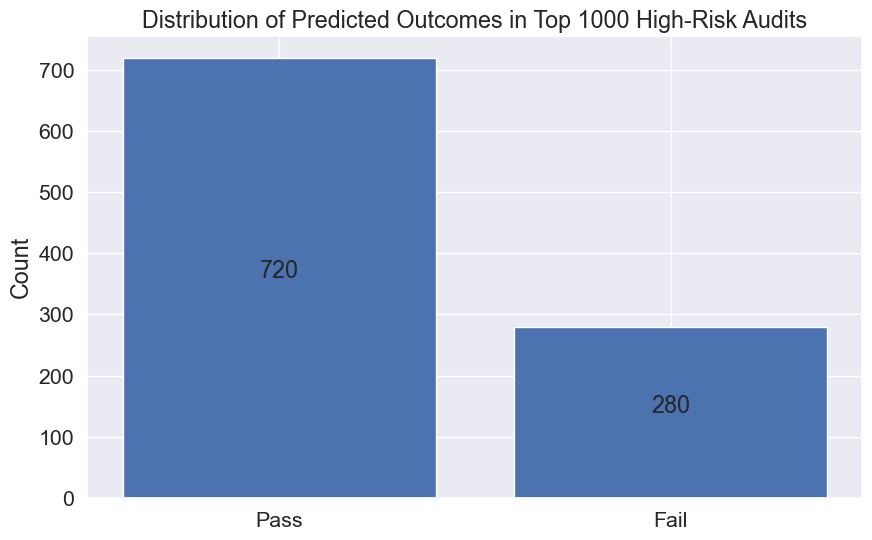


Comparison of targeting vs random sampling (1000 audits):
Fails found with targeted approach: 280
Fails found with random sampling (average): 203.3 ± 11.2
Improvement over random: 37.7%


In [42]:
# Run the complete analysis
y_pred, y_prob = get_predictions(model1, X)
audit_priorities = prioritize_audits(X, y_prob)

print("\nTop 10 highest-risk establishments (by index):")
print(audit_priorities.head(10))

# Plot distribution of top 1000 predictions
priority_indices = audit_priorities['index'].iloc[:1000]  # Using iloc to get first 1000 indices
top_n_predictions = y_pred[:1000]  # Take first 1000 predictions since they're already ordered
pass_count, fail_count = plot_distribution(top_n_predictions, n_samples=1000)

# Compare with random sampling
random_mean, random_std = simulate_random_audits(X, y, n_samples=1000)

print(f"\nComparison of targeting vs random sampling (1000 audits):")
print(f"Fails found with targeted approach: {fail_count}")
print(f"Fails found with random sampling (average): {random_mean:.1f} ± {random_std:.1f}")
print(f"Improvement over random: {(fail_count - random_mean) / random_mean * 100:.1f}%")

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [172]:
# data processing (Identifying any columns in 2011-2013 that are not in the 2014 dataset. Then applying the data processing steps we completed for 
# the 2011-2013 dataset to the 2014 dataset below)
# -----------

# print number of columns in 2014 dataset
print("number of columns in 2014:", len(chicago_inspections_2014.columns))

# get list of column for 2014 dataset
data_2014_cols = set(chicago_inspections_2014.columns)

# Find columns in 2014 but not in 2011-2013
missing_cols = data_2014_cols - data_2011_2013_cols
print("Columns in 2014 but not in 2011-2013:", missing_cols)

# Find columns in 2011-2013 but not in 2014
missing_cols_2 = data_2011_2013_cols - data_2014_cols 
print("Columns in 2011-2013 but not in 2014:", missing_cols_2)



number of columns in 2014: 73
Columns in 2014 but not in 2011-2013: set()
Columns in 2011-2013 but not in 2014: {'pass_flag', 'fail_flag'}


In [174]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome for 2014
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE'],
                                     inplace = True)

# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

# convert the inspection date to a datetime format for 2014
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'])

# drop datetime info from 2014
# -----------
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                                                   'minDate',
                                                                   'maxDate'],
                                                                  axis = 1)

# process features
# -----------

# create feature dataset
X_test = chicago_inspections_2014.drop(columns = ['Results',
                                                  'Facility_Type',
                                                  'LICENSE_DESCRIPTION',
                                                  'WARD_PRECINCT'])


# get dummies
X_test = pd.get_dummies(X_test)

# process target 
# -----------
y_test = chicago_inspections_2014['Results']

# binarize the outcome variable in the test (2014) set
# -----------
#
y_test = y_test.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_test = lb_style.fit_transform(y_test)

# recode 0s and 1s so 1s are "Fail" (the event of interest)
y_test = np.where(y_test == 1, 0 ,1)


KeyError: "['AKA_Name', 'License', 'Address', 'City', 'State', 'Zip', 'Latitude', 'Longitude', 'Location', 'ID', 'LICENSE_ID', 'LICENSE_TERM_START_DATE', 'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'LICENSE_CODE', 'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER', 'LATITUDE', 'LONGITUDE'] not found in axis"

In [177]:
# predict and compare 
# -----------
# Make predictions and ensure 1D arrays
y_pred = model1.predict(X_test).ravel()  # Convert to 1D array
y_pred_prob = model1.predict_proba(X_test)[:, 1].ravel()  # Convert to 1D array

# Convert y_test to 1D array if it isn't already
if len(y_test.shape) > 1:
    y_test = y_test.ravel()

# Create DataFrame comparing actual vs predicted results
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Prediction_Probability': y_pred_prob
})

# Display first few predictions vs actual values
print("Sample of Predictions vs Actual Values:")
print(results_df.head(30))

Sample of Predictions vs Actual Values:
    Actual  Predicted  Prediction_Probability
0        0          0                0.053564
1        0          0                0.018837
2        1          1                0.892497
3        1          1                0.999196
4        1          1                0.726051
5        1          1                0.778812
6        0          0                0.018204
7        1          0                0.048021
8        0          0                0.031932
9        0          0                0.037929
10       0          1                0.602866
11       0          0                0.043545
12       0          0                0.022995
13       0          0                0.052851
14       0          0                0.039788
15       0          0                0.035220
16       0          0                0.030239
17       0          0                0.027662
18       0          0                0.018570
19       0          0                0.0


Model Performance Metrics:
Recall (Detection Rate of Failures): 0.9260
Missed Failure Rate (False Negative Rate): 0.0740

Detailed Numbers:
Total Actual Failures: 784
Correctly Identified Failures: 726
Missed Failures: 58


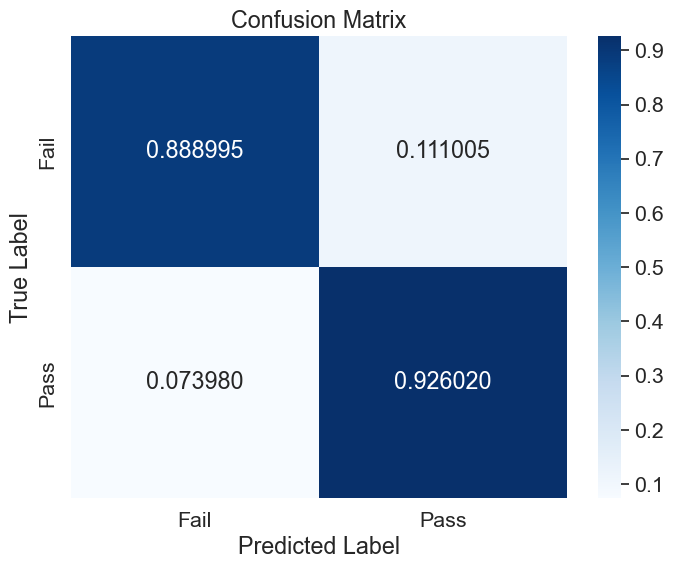

In [180]:
# evaluate
# -----------
from sklearn.metrics import recall_score
# Calculate recall
recall = recall_score(y_test, y_pred)

# Create and analyze confusion matrix for metrics
cm_counts = confusion_matrix(y_test, y_pred)
true_negatives, false_positives, false_negatives, true_positives = cm_counts.ravel()
false_negative_rate = false_negatives / (false_negatives + true_positives)

# Print recall-focused metrics
print("\nModel Performance Metrics:")
print(f"Recall (Detection Rate of Failures): {recall:.4f}")
print(f"Missed Failure Rate (False Negative Rate): {false_negative_rate:.4f}")
print(f"\nDetailed Numbers:")
print(f"Total Actual Failures: {false_negatives + true_positives}")
print(f"Correctly Identified Failures: {true_positives}")
print(f"Missed Failures: {false_negatives}")

# Create normalized confusion matrix visualization
cm = confusion_matrix(y_test, y_pred, normalize='true')

# Create the plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, 
            annot=True, 
            fmt='.6f',
            cmap='Blues',
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'])

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

I focused on recall to evaluate my model. From a public health policy perspective, focusing on recall makes sense because:

* Consequences of False Negatives: In food safety inspections, missing a failure (false negative) is much more costly than incorrectly flagging a pass as a failure (false positive). A missed violation could lead to foodborne illness outbreaks and serious public health consequences.

* Cost-Benefit Trade-off: While false positives (incorrectly predicting a failure) may create extra work for inspectors, this is preferable to missing establishments that truly have food safety violations. The cost of additional inspections is outweighed by the benefit of preventing potential public health hazards.

My model's performance:

* Recall of 0.926 means it correctly identifies 92.6% of actual failures
The confusion matrix shows that of all true failures:
* 88.9% are correctly predicted as failures
* 11.1% are missed (predicted as passes when they actually failed)

In absolute numbers:

Out of 784 actual failures, the model correctly identified 726 and it missed 58 failures. This is relatively strong performance for a public health application, though there's still room for improvement given that 58 failed inspections were missed.

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


**YOUR ANSWER HERE**...
Accuracy alone (correct predictions/total predictions) can be misleading in social policy because it doesn't distinguish between different types of errors. In a system flagging high-risk individuals:

* Precision (true positives/predicted positives) matters when false accusations have high social costs
* Recall (true positives/actual positives) is crucial when missing cases is dangerous (e.g., identifying people who need benefits)
* F1 score (harmonic mean of precision and recall) balances these concerns, but even it needs context

For example, in poverty assistance, high recall might be more important than precision because it's better to give aid to some who don't qualify than miss those in desperate need. The opposite might be true in criminal justice applications. In criminal justice, high precision is perhaps prioritized over recall because falsely labeling someone as high-risk (false positive) can lead to severe consequences like unjust detention, damaged reputation, or harsher sentences.

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**YOUR ANSWER HERE**...
Policymakers could maintain adaptiv emodels, and regularly retrain the models to ensure they capture changing behavior patters. They could also include historical trends in their features, which would make it more obvious when there is a sudden change. 

In addition, as we have discussed in class, they could include an aspect of randomization by adding some randomness to audit selection rather than relying solely on an algorithmic approach. This would maintain some uncertainty even if establishments know the general approach. Finally, policymakers could opt to only announce some aspects of the selection criteria so that establishments can't game all features. 